## Week 4 Challenges - Geovisualization II - Apps

## Create a Dashboard to map the urban heat effect 

* To learn how to use the ArcGIS Dashboard, we will follow an online tutorial that will provide a clear understanding of all the workflows required to create this type of outcome.
  
* This tutorial analyses the urban heat island effect, a concerning challenge that urban areas face each year. This problem is becoming increasingly prominent due to the impact of global warming on cities.

>Urban Heat islands are urbanized areas that experience higher temperatures than outlying areas. Structures such as buildings, roads, and other infrastructure absorb and re-emit the sun’s heat more than natural landscapes such as forests and water bodies. Urban areas, where these structures are highly concentrated and greenery is limited, become “islands” of higher temperatures relative to outlying areas. Source:https://www.epa.gov/heatislands
>
>How can we respond to the dangers of extreme heat in UK cities?, https://blog.metoffice.gov.uk/2022/11/17/how-can-we-respond-to-the-dangers-of-extreme-heat-in-uk-cities/

## Challenge 2

1. Go to this link https://learn.arcgis.com/en/projects/map-and-analyze-the-urban-heat-island-effect/ and follow all the instructions provided. The ETA for this tutorial is 40 mins, but I guess it will take you around 1 hrs if you are not familiar with ArcGIS Online.

>In order to continue with this tutorial, you may require certain credits (the AGOL currency) and software extensions which might not be available in the University Portal. Nevertheless, they contain all the necessary data essential for completing the exercise. Therefore, it is recommended that you go through all the instructions carefully before processing any data.

2. After completing the tutorial, please take a screenshot of your final dashboard and include it in the next markdown cell along with the dashboard link.

![image.png](attachment:7959dbc5-d9c8-4317-abb2-679b60a1a16b.png)


![Dashboard](dashboard_screenshot.png)

[Dashboard Link](https://www.arcgis.com/apps/dashboards/dc924edf57004f3abf1c27035c2ba6fe)

## Challenge 3
 
Now is the time for you to create some choropleth maps. 

1. Go to this portal https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search#/home
2. Get the Scottish Index of Multiple Deprivation (SIMD) 2020 dataset and extract the data only for the city of Edinburgh.
3. Create two static choropleth maps (e.g. `matplotlib`). These maps should represent an attribute you find interesting in the SIMD dataset. Using two different classifier methods, you need to show how the maps appear different even though the data and attributes are the same. Include a clear description of your choice and the difference in the classification method for the attribute chosen (e.g. Plotting histograms with breakpoints(bins). You can find a complete list of classifiers at https://pysal.org/mapclassify/api.html.
4. Finally, create other two interactive maps (e.g. `choropleth_mapbox`) - one for Glasgow and one for Edinburgh - to represent the difference in deprivation for both cities. Pick any of the available attributes.
   > As always include the appropriate descriptions and code comments where you narrate how you are processing the data. And the insights you get from the results.

In [2]:
# import packages
import plotly.express as px
import geopandas as gpd
import mapclassify as mc
import matplotlib.pyplot as plt
import folium
import seaborn as sns

# open files 
shapefile_path = 'data_lab4/SG_SIMD_2020/SG_SIMD_2020.shp'
gdf = gpd.read_file(shapefile_path)

# subset data for City of Edinburgh
subset = gdf["LAName"] == "City of Edinburgh"
gdf = gdf[subset]

# change the datatype of DataZone into string and set it as index
gdf['DataZone'] = gdf['DataZone'].astype('string')
gdf.set_index('DataZone', inplace=True)

# check the data
gdf.head()

,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,IncRate,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
DataZone,,,,,,,,,,,,,,,,,,,,,
S01008417,Balerno and Bonnington Village - 01,City of Edinburgh,708,397,5537,4,8,16,80,5%,...,86,5392.0,17,8,2%,1%,6350.0,20191.721420,1.029993e+07,"POLYGON ((315157.369 666212.846, 315173.727 66..."
S01008418,Balerno and Bonnington Village - 02,City of Edinburgh,691,378,6119,5,9,18,88,2%,...,103,5063.0,7,10,1%,1%,6650.0,25944.861787,2.357050e+07,"POLYGON ((317816.000 666579.000, 318243.000 66..."
S01008419,Balerno and Bonnington Village - 03,City of Edinburgh,541,338,5200,4,8,15,75,5%,...,187,3594.0,30,0,6%,0%,5372.5,5738.935106,1.366457e+06,"POLYGON ((316831.000 667049.000, 316816.000 66..."
S01008420,Balerno and Bonnington Village - 04,City of Edinburgh,466,274,6431,5,10,19,93,2%,...,109,4957.0,2,0,0%,0%,6957.0,1890.096713,1.051967e+05,"POLYGON ((316368.000 666124.000, 316379.297 66..."
S01008421,Balerno and Bonnington Village - 05,City of Edinburgh,884,537,3441,3,5,10,50,10%,...,264,2575.0,61,6,7%,1%,4598.0,2645.609037,1.465441e+05,"POLYGON ((316411.427 666596.771, 316422.940 66..."


In [3]:
# chosen attibute: HlthDprsPc - Proportion of population being prescribed drugs for depression or anxiety
# the chosen attribute is stored as percentage

# remove % sign and divide by 100 to convert the string into a float
gdf['HlthDprsPc_float'] = gdf['HlthDprsPc'].str.rstrip('%').astype('float') / 100.0

# check if successful
gdf.dtypes

DZName                object
LAName                object
SAPE2017               int64
WAPE2017               int64
Rankv2                 int64
Quintilev2             int64
Decilev2               int64
Vigintilv2             int64
Percentv2              int64
IncRate               object
IncNumDep              int64
IncRankv2            float64
EmpRate               object
EmpNumDep              int64
EmpRank              float64
HlthCIF                int64
HlthAlcSR              int64
HlthDrugSR             int64
HlthSMR                int64
HlthDprsPc            object
HlthLBWTPc            object
HlthEmergS             int64
HlthRank               int64
EduAttend             object
EduAttain            float64
EduNoQuals             int64
EduPartici            object
EduUniver             object
EduRank                int64
GAccPetrol           float64
GAccDTGP             float64
GAccDTPost           float64
GAccDTPsch           float64
GAccDTSsch           float64
GAccDTRet     

In [4]:
# classify data
# Number of classes for classification
num_classes = 5

# Using Natural Breaks (Jenks) classification
classifier_nb = mc.NaturalBreaks(gdf['HlthDprsPc_float'], k=num_classes)
print(classifier_nb)
print(min(classifier_nb.bins), max(classifier_nb.bins))
print(classifier_nb.bins)

# Using Equal Interval classification
classifier_ei = mc.EqualInterval(gdf['HlthDprsPc_float'], k=num_classes)
print(classifier_ei)
print(min(classifier_ei.bins), max(classifier_ei.bins))
print(classifier_ei.bins)

NaturalBreaks

  Interval     Count
--------------------
[0.05, 0.10] |    72
(0.10, 0.13] |   179
(0.13, 0.17] |   174
(0.17, 0.21] |   111
(0.21, 0.32] |    61
0.1 0.32
[0.1  0.13 0.17 0.21 0.32]
EqualInterval

  Interval     Count
--------------------
[0.05, 0.10] |    72
(0.10, 0.16] |   283
(0.16, 0.21] |   181
(0.21, 0.27] |    51
(0.27, 0.32] |    10
0.10400000000000001 0.32
[0.104 0.158 0.212 0.266 0.32 ]


C:\Users\42191\miniforge3\envs\ua\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


C:\Users\42191\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\42191\miniforge3\envs\ua\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


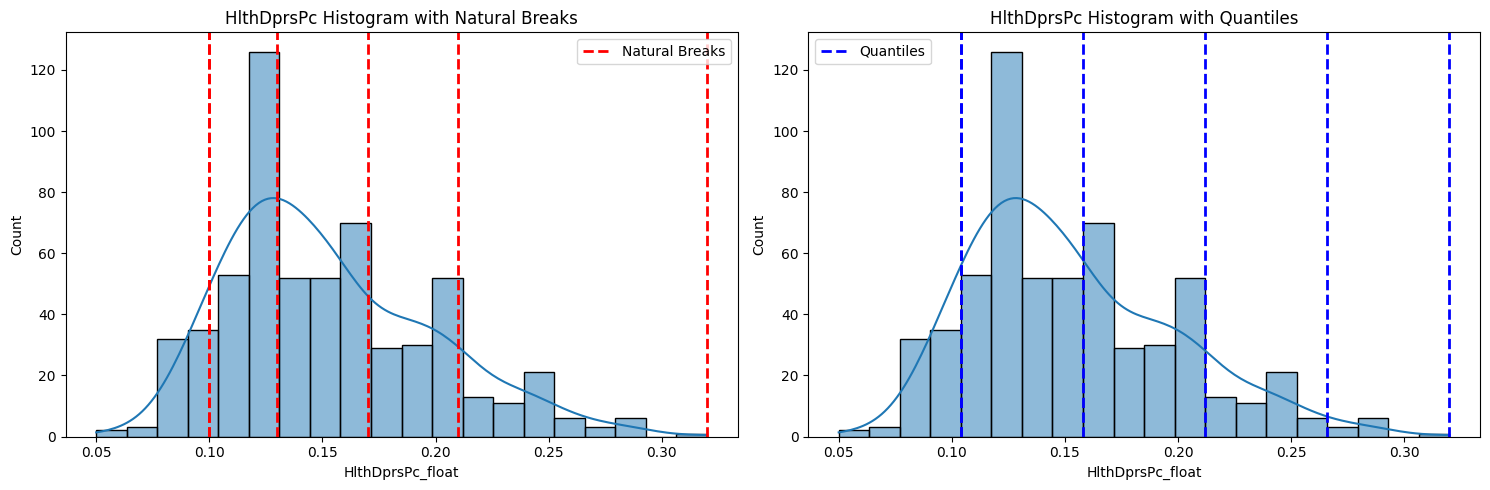

In [5]:
# plot histograms showing classification methods and breaks

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=gdf, x="HlthDprsPc_float", ax=axes[0], kde=True, bins=20)
axes[0].axvline(classifier_nb.bins[0], color='red', linestyle='dashed', linewidth=2, label='Natural Breaks')
for bin_value in classifier_nb.bins:
    axes[0].axvline(bin_value, color='red', linestyle='dashed', linewidth=2)
axes[0].set_title("HlthDprsPc Histogram with Natural Breaks")
axes[0].legend()

# 3. The next plot using now ax=axes[1]
sns.histplot(data=gdf, x="HlthDprsPc_float", ax=axes[1], kde=True, bins=20)
axes[1].axvline(classifier_ei.bins[0], color='blue', linestyle='dashed', linewidth=2, label='Quantiles')
for bin_value in classifier_ei.bins:
    axes[1].axvline(bin_value, color='blue', linestyle='dashed', linewidth=2)
axes[1].set_title("HlthDprsPc Histogram with Quantiles")
axes[1].legend()

# 4. Adjust the plot.
plt.tight_layout()
plt.show()

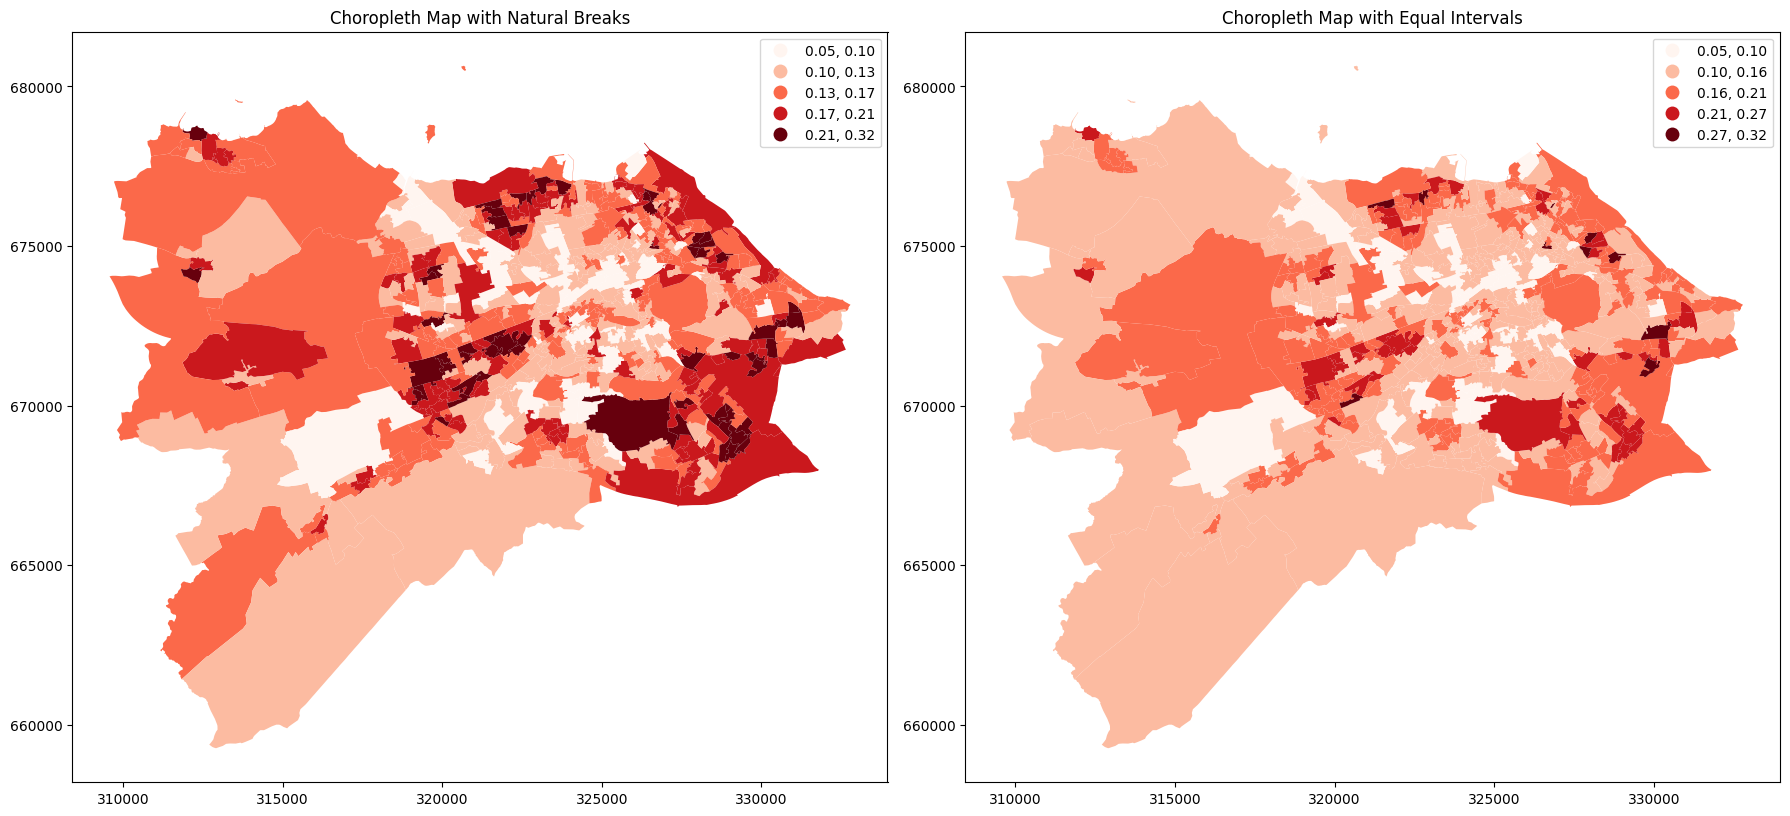

In [6]:
# plot 2 choropleth maps for the same attribute with different classifications

fig, axs = plt.subplots(1, 2, figsize=(18, 8)) # plot side by side

gdf.plot(column='HlthDprsPc_float', ax=axs[0],
         legend=True, cmap='Reds',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_nb.bins}
        )

axs[0].set_title("Choropleth Map with Natural Breaks")

gdf.plot(column='HlthDprsPc_float', ax=axs[1],
         legend=True, cmap='Reds',
         scheme='UserDefined',
         classification_kwds={'bins': classifier_ei.bins})

axs[1].set_title("Choropleth Map with Equal Intervals")

plt.tight_layout() #Optional but useful.
plt.show()

In [ ]:
fig_1 = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           color="HlthDprsPc_float",
                           color_continuous_scale="Reds",
                           range_color= (0,1),
                           opacity=0.5,
                           center={"lat": 55.948401, "lon": -3.198140},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig_1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_1.show()

In [14]:
shapefile_path = 'data_lab4/SIMD_Glasgow/SIMD_2020_GlasgowCity.shp'
gdf_G = gpd.read_file(shapefile_path)

gdf_G.set_index('DataZone', inplace=True)

gdf_G['HlthDprsPc_float'] = gdf_G['HlthDprsPc'].str.rstrip('%').astype('float') / 100.0

gdf_G.head()

,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,IncRate,...,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry,HlthDprsPc_float
DataZone,,,,,,,,,,,,,,,,,,,,,
S01009758,Darnley East - 01,Glasgow City,624,407,4997,4,8,15,72,3%,...,5523.0,73,43,13%,8%,1021.0,1474.152028,78490.309008,"POLYGON ((-4.32476 55.79910, -4.32574 55.79840...",0.22
S01009759,Darnley East - 02,Glasgow City,860,570,161,1,1,1,3,45%,...,791.0,223,29,24%,3%,494.0,2170.701472,136091.515542,"POLYGON ((-4.32823 55.81192, -4.32837 55.81166...",0.26
S01009760,Darnley East - 03,Glasgow City,852,550,998,1,2,3,15,23%,...,2079.0,173,8,19%,1%,1157.0,3057.747139,332345.088422,"POLYGON ((-4.32429 55.80524, -4.32408 55.80505...",0.27
S01009761,Darnley East - 04,Glasgow City,846,558,3135,3,5,9,45,13%,...,5459.0,122,24,13%,3%,1878.0,2761.244322,156078.015080,"POLYGON ((-4.32934 55.80065, -4.32952 55.80036...",0.23
S01009762,Darnley East - 05,Glasgow City,1183,801,1247,1,2,4,18,25%,...,1904.0,201,6,22%,1%,870.0,2295.018993,150737.851165,"POLYGON ((-4.33150 55.80660, -4.33145 55.80649...",0.24


In [ ]:
# mapping the attribute for Glasgow

fig2 = px.choropleth_mapbox(gdf_G,
                           geojson=gdf_G.geometry,
                           locations=gdf_G.index,
                           color="HlthDprsPc_float",
                           color_continuous_scale="Reds",
                           range_color=(0, 1),
                           opacity=0.5,
                           center={"lat": 55.866193, "lon": -4.258246},
                           mapbox_style="carto-positron",
                           zoom=9.5)
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

### Screenshot of the final map obtained in this challenge

![Final Map](final_map_screenshot.png)
